In [76]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.projections import get_projection_class

from matplotlib.patches import Arc

from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen

In [2]:
parser = Sbopen()

df_competition = parser.competition()
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             67 non-null     int64 
 1   season_id                  67 non-null     int64 
 2   country_name               67 non-null     object
 3   competition_name           67 non-null     object
 4   competition_gender         67 non-null     object
 5   competition_youth          67 non-null     bool  
 6   competition_international  67 non-null     bool  
 7   season_name                67 non-null     object
 8   match_updated              67 non-null     object
 9   match_updated_360          51 non-null     object
 10  match_available_360        5 non-null      object
 11  match_available            67 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.5+ KB


In [4]:
df_competition[df_competition['country_name'] == 'International']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
25,1470,274,International,FIFA U20 World Cup,male,False,False,1979,2023-06-28T10:55:11.501179,None,None,2023-06-28T10:55:11.501179
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-08-12T16:44:27.619465,2023-08-17T15:55:15.164685,2023-08-17T15:55:15.164685,2023-08-12T16:44:27.619465
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
28,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,54,International,FIFA World Cup,male,False,True,1986,2023-06-28T11:20:34.252935,2021-06-13T16:17:31.694,None,2023-06-28T11:20:34.252935
30,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207
31,43,272,International,FIFA World Cup,male,False,True,1970,2023-07-17T23:24:45.579886,None,None,2023-07-17T23:24:45.579886
32,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,269,International,FIFA World Cup,male,False,True,1958,2023-06-26T10:33:08.214831,None,None,2023-06-26T10:33:08.214831
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [6]:
df_match = parser.match(competition_id=43, season_id=106)

df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


In [18]:
poland_games = df_match.query('home_team_name == "Poland" or away_team_name == "Poland"').reset_index()

In [28]:
df_event = pd.DataFrame()
df_related = pd.DataFrame()
df_freeze = pd.DataFrame()
df_tactics = pd.DataFrame()





In [36]:
for id in poland_games['match_id']:
    event, related, freeze, tactics = parser.event(id)
    df_event = df_event.append(event, ignore_index=True)
    df_related = df_related.append(related, ignore_index=True)
    df_freeze = df_freeze.append(freeze, ignore_index=True)
    df_tactics = df_tactics.append(tactics, ignore_index=True)

/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_73611/1394035147.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_event = df_event.append(event, ignore_index=True)
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_73611/1394035147.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_related = df_related.append(related, ignore_index=True)
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_73611/1394035147.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freeze = df_freeze.append(freeze, ignore_index=True)
/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_73611/1394035147.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [38]:
from mplsoccer import Pitch

In [48]:
passes = df_event.loc[df_event['type_name'] == 'Pass'].loc[df_event['sub_type_name'] != 'Throw-in'].loc[df_event['sub_type_name'] != 'Corner'].set_index('id')

passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_name,pass_no_touch,dribble_nutmeg,block_save_block,block_deflection,pass_miscommunication,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive
id,,,,,,,,,,,,,,,,,,,,,
a98cb7b0-0188-4d18-88f8-d6d945ed21a5,5,1,00:00:00.321000,0,0,2,1.955771,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76fd4763-1d2b-4b26-b76a-466cc58c1c24,8,1,00:00:02.972000,0,2,2,4.632066,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79fc819b-86bd-4098-aa0b-031b891e2ee7,13,1,00:00:19.698000,0,19,3,1.171469,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e308fd2f-7cc2-40e9-ba78-d470ffde5e55,17,1,00:00:21.587000,0,21,3,0.046691,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c591c6a0-a72c-42b8-9808-4d3f386f7958,27,1,00:00:24.961000,0,24,4,1.936668,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


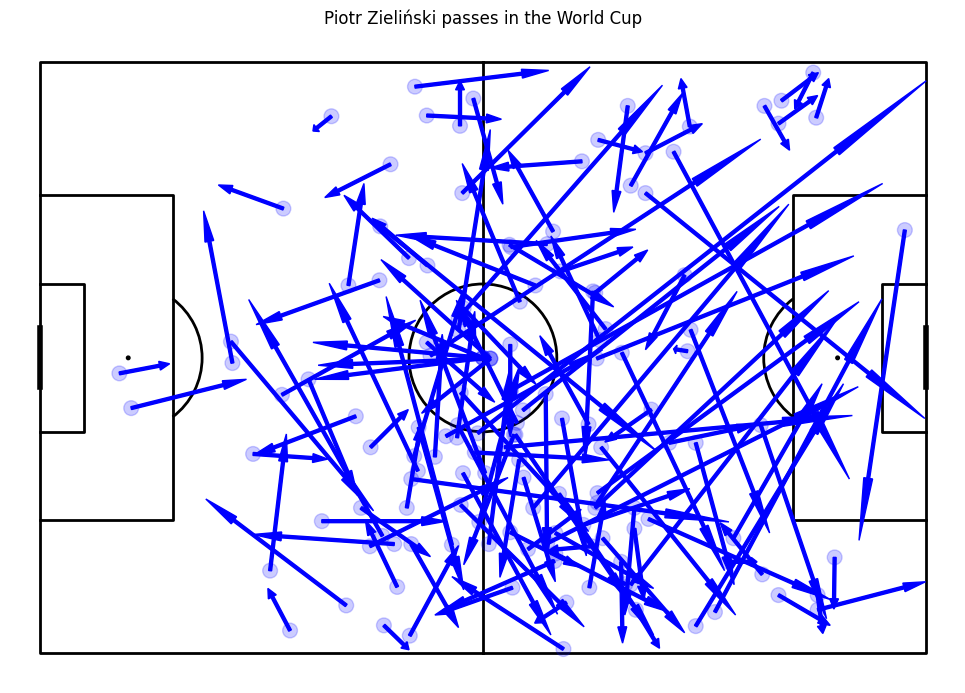

In [49]:
pitch = Pitch(line_color = 'black')
fig,ax = pitch.draw(figsize=(10,7))

for i,thepass in passes.iterrows():
    if thepass['player_name'] == 'Piotr Zieliński':
        x=thepass['x']
        y=thepass['y']

        passCircle=plt.Circle((x,y),1,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=2,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Piotr Zieliński passes in the World Cup")
fig.set_size_inches(10, 7)
plt.show()




In [50]:
passes_zielinski = passes.loc[passes['player_name'] == 'Piotr Zieliński']

passes_zielinski

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_name,pass_no_touch,dribble_nutmeg,block_save_block,block_deflection,pass_miscommunication,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive
id,,,,,,,,,,,,,,,,,,,,,
92507b50-1bde-4ebf-bb1c-44cdf945911d,113,1,00:03:56.854000,3,56,11,0.758957,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a54d4dc7-3e23-4926-b9ea-cd8ade39ec61,198,1,00:05:27.203000,5,27,14,1.256127,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bf3efbd9-666e-41bf-a716-d089691c25f3,321,1,00:08:21.246000,8,21,18,0.718403,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feed083d-09be-48bc-b183-31fa3138e32b,455,1,00:11:34.582000,11,34,26,1.400226,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80173440-c13b-49c2-9f05-95b9d93e998b,481,1,00:12:07.603000,12,7,26,1.600000,3857264,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6bcc89c2-5a09-4a1a-8d72-5c79d764a598,2190,2,00:19:32.926000,64,32,116,0.993985,3857265,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbf45672-3b13-4508-9902-7cd0c08c0aef,2231,2,00:20:28.660000,65,28,118,2.029869,3857265,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711d588c-a1ef-4079-9308-bcf0f1639346,2275,2,00:21:32.382000,66,32,119,1.951459,3857265,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'pitch': array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object), 'title': <Axes: >, 'endnote': <Axes: >}


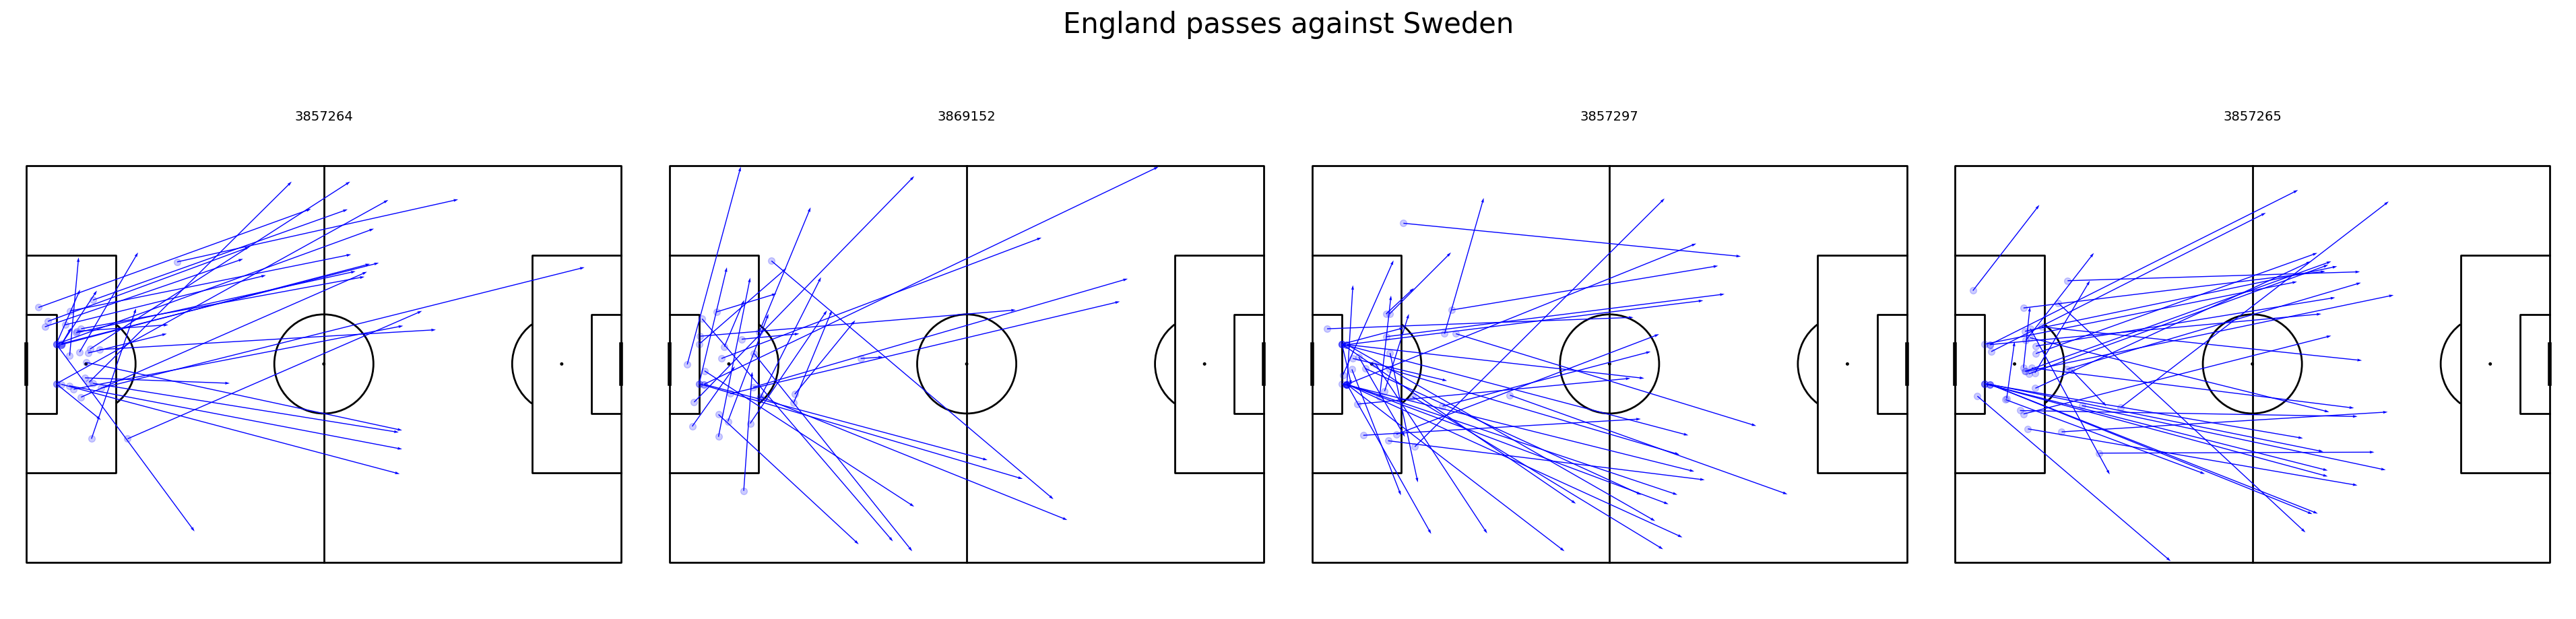

In [106]:
mask_england = (passes.type_name == 'Pass') & (passes.player_name == "Wojciech Szczęsny") & (passes.sub_type_name != "Throw-in")
df_passes = passes.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'match_id']]
#get the list of all players who made a pass
matches = df_passes['match_id'].unique()



#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 1, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for match, ax in zip(matches, axs['pitch'].flat[:len(matches)]):
    #put player name over the plot
    ax.text(60, -10, match,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["match_id"] == match]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

print(axs)
#We have more than enough pitches - remove them


#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'England passes against Sweden', ha='center', va='center', fontsize=30)
plt.show()


In [117]:
def Passer(player):

    local_df = passes.copy(deep=True)
    local_df = local_df[local_df["player_name"]==player]
    local_df = local_df.dropna(axis=1, how="all")

    df1 = local_df[['pass_angle','pass_length']].copy()
    bins = np.linspace(-np.pi,np.pi,20)
    df1['binned'] = pd.cut(local_df['pass_angle'], bins, include_lowest=True, right = True)
    df1["Bin_Mids"] = df1["binned"].apply(lambda x: x.mid)
    df1 = df1[:-1]

    A= df1.groupby("Bin_Mids", as_index=False)["pass_length"].mean()
    A = A.dropna(0)

    return A

In [73]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                  ['#e3aca7', '#c03a1d'], N=100)

/var/folders/mn/686s79xs0mv06qcjlx9yv1440000gn/T/ipykernel_73611/1946690372.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  A = A.dropna(0)


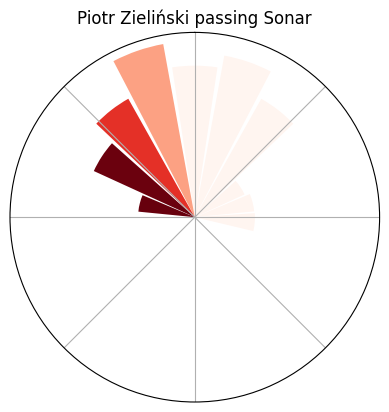

In [118]:
a = Passer("Wojciech Szczęsny")

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")  # theta=0 at the top


theta = a["Bin_Mids"]

radii = a["pass_length"]

bars = ax.bar(theta, radii, width=0.3, bottom=0.0)

ax.set_xticklabels([])

ax.set_yticks([])

ax.set_title("Piotr Zieliński passing Sonar")

ax.spines['polar'].set_visible(True)

for r, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.Reds(r))
    

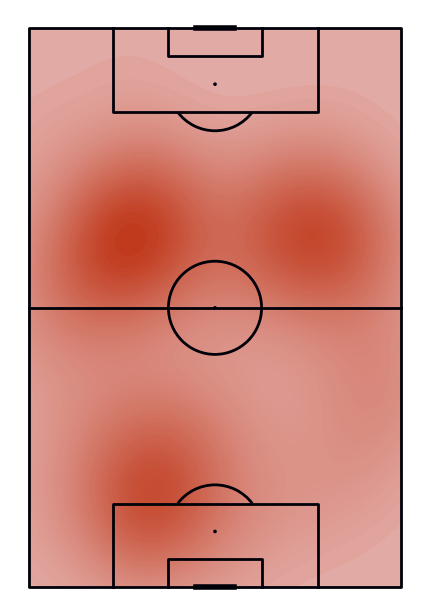

In [114]:
pitch = VerticalPitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(df_passes.end_x, df_passes.end_y, ax=ax,
                    # fill using 100 levels so it looks smooth
                    fill=True, levels=100,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    thresh=0,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=flamingo_cmap)